In [1]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import datetime
from datetime import timedelta
from operator import sub

In [2]:
data_sample_import = pd.read_csv('../DataSample__201709211530.csv')
data_workout = pd.read_csv('../DataWorkoutRun__201709211532.csv')

In [3]:
print(list(data_sample_import))

['_id', 'owner', 'source', 'sourceId', 'sourceName', 'type', 'startDate', 'endDate', 'value', 'content', 'originalData', 'createdAt', 'updatedAt']


In [4]:
data_sample = data_sample_import.drop(['owner', 'source', 'sourceId', 'sourceName', 'content', 'originalData', 'createdAt', 'updatedAt'], axis = 1)
data_sample.head(n = 5)

,_id,type,startDate,endDate,value
0,1ff0fb89-6e1b-4601-84d0-98c79fdc5f2e,health-bmi,2014-08-27 21:41:23,2014-08-27 21:41:23,26.7386817932
1,78219621-1da4-4e3b-87bc-f4885718c63f,health-weight,2014-08-27 21:41:23,2014-08-27 21:41:23,71.0419998169
2,2d917e7e-0844-4f52-b15e-2a5346c96dda,health-bmi,2014-08-28 06:24:53,2014-08-28 06:24:53,26.5866241455
3,ab800f4b-bef7-434e-8e57-e0fccc44bfb7,health-body-fat,2014-08-28 06:24:53,2014-08-28 06:24:53,0.2586992979
4,fb2a0865-17c3-4ac0-a782-749cc7befe12,health-weight,2014-08-28 06:24:53,2014-08-28 06:24:53,70.6380004883


In [5]:
data_sample.groupby('type').count()

,_id,startDate,endDate,value
type,,,,
health-bmi,397,397,397,397
health-body-fat,368,368,368,368
health-heart-rate,7000,7000,7000,7000
health-sleep,466,466,466,466
health-step-count,9860,9860,9860,9860
health-weight,422,422,422,422


## Some notes on data_sample
- health-sleep has no useful data...all entries are 0
- startDate and endDate are the same for most types (exception is health-step-count)

In [6]:
#Converting values to float
data_sample['value'] = [i.replace(',', '') for i in data_sample['value']]
data_sample['value'] = pd.to_numeric(data_sample['value'])

In [7]:
fmt = "%Y-%m-%d %H:%M:%S"
data_sample['startDate'] = pd.Series([datetime.datetime.strptime(i, fmt) for i in data_sample['startDate']])

In [8]:
data_sample['endDate'] = pd.Series([datetime.datetime.strptime(i, fmt) for i in data_sample['endDate']])

In [9]:
#Creating a dictionary of data frames of only each unique type
health_bmiDF = data_sample[data_sample['type'] == 'health-bmi']
health_bodyfatDF = data_sample[data_sample['type'] == 'health-body-fat']
health_heartrateDF = data_sample[data_sample['type'] == 'health-heart-rate']
health_stepcountDF = data_sample[data_sample['type'] == 'health-step-count']
health_weightDF = data_sample[data_sample['type'] == 'health-weight']
health_sleepDF = data_sample[data_sample['type'] == 'health-sleep']
typesDict = {'health_bmiDF': health_bmiDF, 'health_bodyfatDF': health_bodyfatDF, 'health_heartrateDF': health_heartrateDF, 'health_stepcountDF': health_stepcountDF, 'health_weightDF': health_weightDF, 'health_sleepDF': health_sleepDF}


In [10]:
#adding difference of times
for key, df in typesDict.items():
    day = list(df['startDate'])
    nextday = list(df['startDate'])
    day.insert(0, day[0])
    day = day[0: len(day) - 1]
    timePassed = []
    for i in range(0,len(day)):
        timePassed.append(nextday[i] - day[i])
    df['timePassed'] = timePassed


/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
timePassed

[Timedelta('0 days 00:00:00'),
 Timedelta('1 days 00:23:16'),
 Timedelta('3 days 02:51:12'),
 Timedelta('0 days 20:45:32'),
 Timedelta('1 days 01:44:44'),
 Timedelta('0 days 22:15:16'),
 Timedelta('0 days 04:31:20'),
 Timedelta('0 days 02:29:04'),
 Timedelta('0 days 00:53:12'),
 Timedelta('0 days 16:06:24'),
 Timedelta('0 days 07:54:08'),
 Timedelta('2 days 16:05:52'),
 Timedelta('1 days 01:15:44'),
 Timedelta('1 days 01:30:48'),
 Timedelta('0 days 21:13:28'),
 Timedelta('1 days 01:02:28'),
 Timedelta('3 days 03:26:20'),
 Timedelta('0 days 05:13:16'),
 Timedelta('0 days 15:18:32'),
 Timedelta('0 days 06:21:16'),
 Timedelta('0 days 00:05:40'),
 Timedelta('0 days 00:03:40'),
 Timedelta('0 days 17:28:48'),
 Timedelta('0 days 23:15:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('2 days 23:45:00'),
 Timedelta('1 days 00:00:00'),
 Timedelta('1 days 01:45:16'),
 Timedelta('0 days 07:09:40'),
 Timedelta('0 days 23:35:11'),
 Timedelta('0 days 15:30:21'),
 Timedelta('2 days 23:59:32'),
 Timedel

In [12]:
#Dictionary of Outliers
outliersDict = {key: df[abs(df['value'] - np.mean(df['value'])) > 3 * np.std(df['value'])] for key, df in typesDict.items()}
outliersDict.keys()

dict_keys(['health_bmiDF', 'health_bodyfatDF', 'health_heartrateDF', 'health_stepcountDF', 'health_weightDF', 'health_sleepDF'])

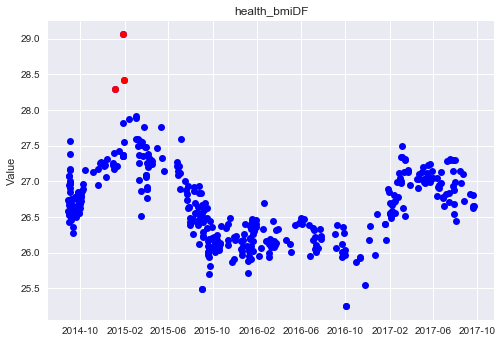

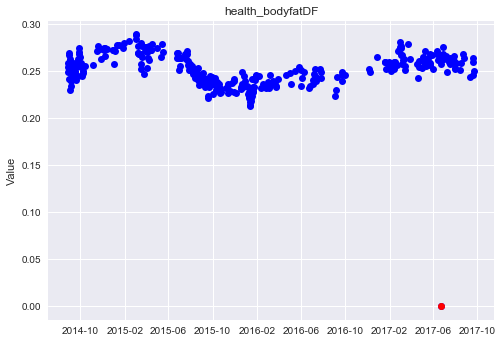

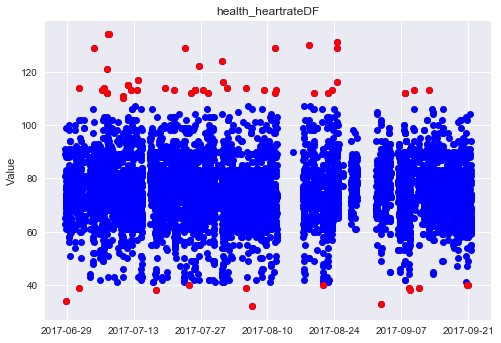

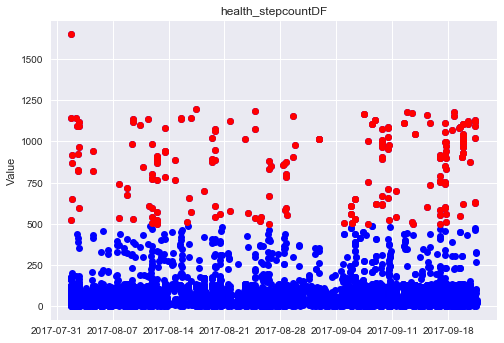

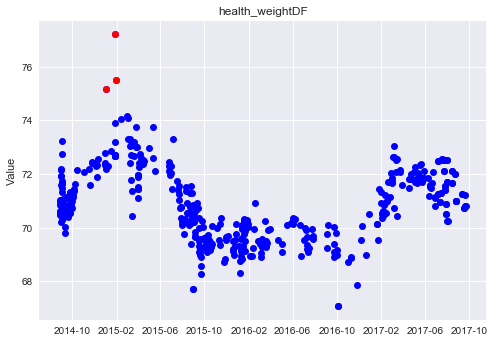

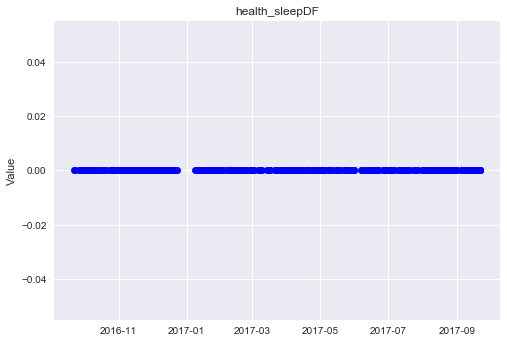

In [13]:
for key, df in typesDict.items():
    plt.figure()
    plt.plot(df['startDate'], df['value'], 'bo')
    plt.plot(outliersDict[key]['startDate'], outliersDict[key]['value'], 'ro')
    plt.title(key)
    plt.ylabel('Value')

In [14]:
#Dictionary of Outliers for Time
outliers_timeDict = {key: df[abs(df['timePassed'] - np.mean(df['timePassed'])) > 3 * np.std(df['timePassed'])] for key, df in typesDict.items()}
outliers_timeDict.keys()

dict_keys(['health_bmiDF', 'health_bodyfatDF', 'health_heartrateDF', 'health_stepcountDF', 'health_weightDF', 'health_sleepDF'])

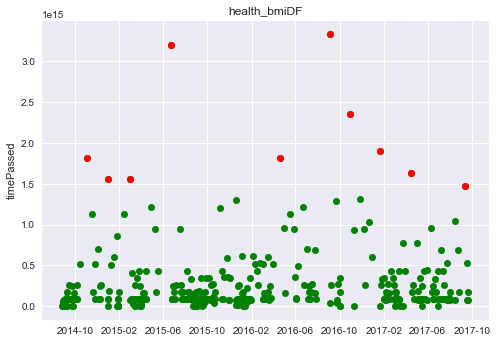

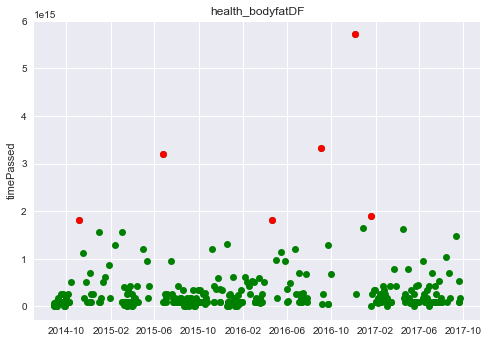

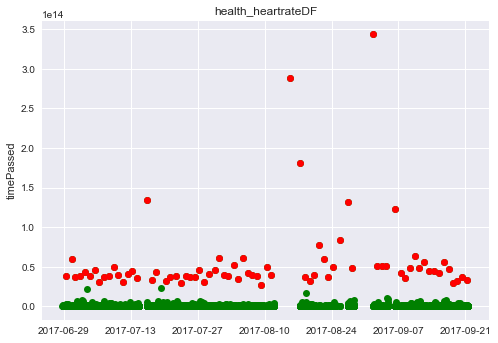

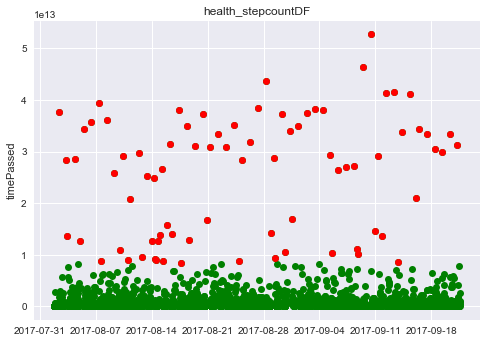

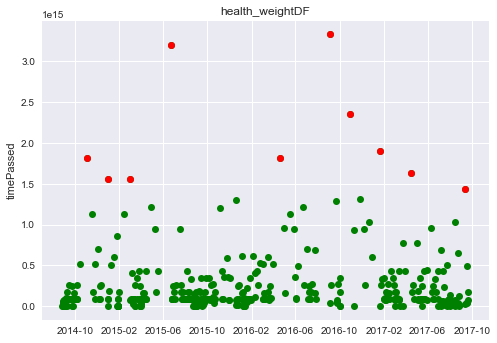

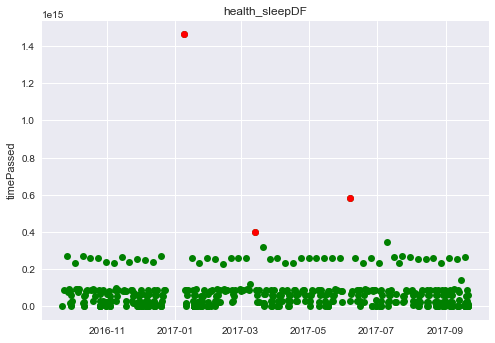

In [15]:
#plotting timePassed
for key, df in typesDict.items():
    plt.figure()
    plt.plot(df['startDate'], df['timePassed'], 'go')
    plt.plot(outliers_timeDict[key]['startDate'], outliers_timeDict[key]['timePassed'], 'ro')
    plt.title(key)
    plt.ylabel('timePassed')

In [16]:
#Value outliers in outliersDict
#timePassed outliers in outliers_timeDict
#data frames by type in typesDict

# Beginning work with time

In [18]:
def averagebytime(dictionary, f):
    byMonthDict = {}
    for key, df in dictionary.items():
        df.index = df['startDate']
        byMonthDict[key] = df.groupby(pd.TimeGrouper(freq = f)).mean()
    return byMonthDict

In [19]:
#Dictionary of value averaged by month
timeMDict = averagebytime(typesDict, 'M')

In [20]:
timeMDict['health_bmiDF'].head(n = 5)

,value
startDate,
2014-08-31,26.729198
2014-09-30,26.739751
2014-10-31,26.881545
2014-11-30,27.156538
2014-12-31,27.243123


In [21]:
#Dictionary of value averaged by year
time12MDict = averagebytime(typesDict, '12M')

In [22]:
time12MDict['health_bmiDF']

,value
startDate,
2014-08-31,26.729198
2015-08-31,26.986257
2016-08-31,26.200118
2017-08-31,26.750850
2018-08-31,26.710906


In [23]:
#Dictionary of value averaged by half-year
time6MDict = averagebytime(typesDict, '6M')
time6MDict.keys()

dict_keys(['health_bmiDF', 'health_bodyfatDF', 'health_heartrateDF', 'health_stepcountDF', 'health_weightDF', 'health_sleepDF'])

In [24]:
time6MDict['health_bmiDF']

,value
startDate,
2014-08-31,26.729198
2015-02-28,27.035279
2015-08-31,26.942076
2016-02-29,26.197463
2016-08-31,26.206609
2017-02-28,26.347120
2017-08-31,27.013594
2018-02-28,26.710906
